
Данные

Игра содержит особое событие – ивент, для прохождения которого пользователи могут тратить деньги. Группа дизайнеров решила поменять вид окошка покупки ивентовых продуктов. Чтобы оценить результат нововведения, провели АБ тест, разделив пользователей на две группы: контрольную и тестовую (с окошком нового типа).

Задача
Исследовать какая из АБ групп лучше себя показала. Результаты предоставить в понятной для широкой аудитории форме, сопроводив по необходимости графиками/дашбордами/числами. Колонки

1. AbGroup – имя АБ группы: Control/Test
2. user_id – id пользователя
3. time_stamp – день события
4. install_date – день установки приложения пользователем
5. event_name – техническое название события (InAppPurchase - в случае покупки за деньги, ResourceSpend в случае покупки за игровую валюту)
6. platform – платформа google / itunes
7. network_name – пользователь установил игру по переходу с рекламы (Paid) или нет (Organic)
8. country_name – страна пользователя
9. InGameTime – сколько всего пользователь провел в игре секунд
10. LastCompletedLevel – номер последнего пройденного уровня
11. avg_energy_amount – сколько в среднем энергии было у пользователя за день
12. revenue_on_event – ревеню, потраченное на покупку ивентовых продуктов
13. revenue_on_other_activities – ревеню, потраченное на остальные продукты, включая золото
14. gold_on_event – золото, потраченное на ивентный прогресс
15. gold_on_other_activities – золото, потраченное на другие продукты

In [35]:
!gdown --id 1ynnyIKbT64yoi0IpMd_Gs3I-n1m61QT-

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1ynnyIKbT64yoi0IpMd_Gs3I-n1m61QT-
To: /content/test_task_product_analyst_2021_20210427.csv
100% 102M/102M [00:00<00:00, 126MB/s] 


In [36]:
import pandas as pd
import numpy as np

In [37]:
df = pd.read_csv('/content/test_task_product_analyst_2021_20210427.csv')
df.head()

,AbGroup,user_id,time_stamp,install_date,event_name,platform,network_name,country_name,InGameTime,LastCompletedLevel,avg_energy_amount,revenue_on_event,revenue_on_other_activities,gold_on_event,gold_on_other_activities
0,Control,d60ebcaecff2dc1d360a8a41271e6fd8a902c107,2020-02-10,2019-11-10,ResourceSpend,itunes,Organic,United Kingdom of Great Britain and Northern I...,276180,345,54.0,0.0,0.0,NaN,NaN
1,Test,f6e385b0ab43d5aea9cfcc408aa84029a4ea5fdb,2020-03-04,2019-11-05,ResourceSpend,itunes,Paid,United States of America,166095,199,50.0,0.0,0.0,NaN,NaN
2,Control,a4c80c8524e2c11cc238553d7b02da01ce2aad66,2020-02-26,2020-01-02,ResourceSpend,itunes,Paid,Canada,240986,84,39.0,0.0,0.0,NaN,NaN
3,Control,7ea2e4599ae33760c307e254839317bd5b17a63c,2020-02-21,2020-01-13,ResourceSpend,itunes,Organic,France,989822,1176,21.0,0.0,0.0,NaN,NaN
4,Control,6495168982929360dc6d84bf0766d8963a7ddc41,2020-02-18,2020-02-05,ResourceSpend,itunes,Paid,Spain,52106,66,43.0,0.0,0.0,500.0,NaN


In [38]:
df['AbGroup'].value_counts()

Control    558070
Test       138770
Name: AbGroup, dtype: int64

In [39]:
df['AbGroup'].value_counts(normalize=True)

Control    0.800858
Test       0.199142
Name: AbGroup, dtype: float64

In [40]:
df.groupby('AbGroup')['user_id'].agg(['count','nunique'])

,count,nunique
AbGroup,,
Control,558070,89034
Test,138770,22278


In [41]:
df.head()

,AbGroup,user_id,time_stamp,install_date,event_name,platform,network_name,country_name,InGameTime,LastCompletedLevel,avg_energy_amount,revenue_on_event,revenue_on_other_activities,gold_on_event,gold_on_other_activities
0,Control,d60ebcaecff2dc1d360a8a41271e6fd8a902c107,2020-02-10,2019-11-10,ResourceSpend,itunes,Organic,United Kingdom of Great Britain and Northern I...,276180,345,54.0,0.0,0.0,NaN,NaN
1,Test,f6e385b0ab43d5aea9cfcc408aa84029a4ea5fdb,2020-03-04,2019-11-05,ResourceSpend,itunes,Paid,United States of America,166095,199,50.0,0.0,0.0,NaN,NaN
2,Control,a4c80c8524e2c11cc238553d7b02da01ce2aad66,2020-02-26,2020-01-02,ResourceSpend,itunes,Paid,Canada,240986,84,39.0,0.0,0.0,NaN,NaN
3,Control,7ea2e4599ae33760c307e254839317bd5b17a63c,2020-02-21,2020-01-13,ResourceSpend,itunes,Organic,France,989822,1176,21.0,0.0,0.0,NaN,NaN
4,Control,6495168982929360dc6d84bf0766d8963a7ddc41,2020-02-18,2020-02-05,ResourceSpend,itunes,Paid,Spain,52106,66,43.0,0.0,0.0,500.0,NaN


In [42]:
df['time_stamp'] = pd.to_datetime(df['time_stamp'], errors='coerce', format='%Y-%m-%d')

In [43]:
df['install_date'] = pd.to_datetime(df['install_date'], errors='coerce', format='%Y-%m-%d')

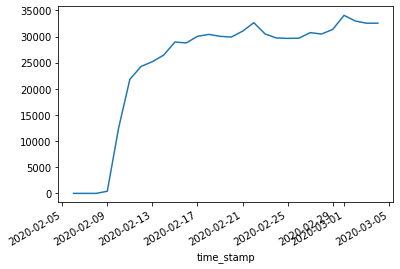

In [44]:
df.groupby('time_stamp')['user_id'].count().plot()

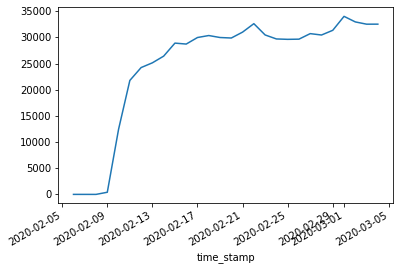

In [45]:
df.groupby('time_stamp')['user_id'].nunique().plot()

In [46]:
df.groupby('time_stamp')['user_id'].agg(['count','nunique'])

,count,nunique
time_stamp,,
2020-02-06,4,3
2020-02-08,1,1
2020-02-09,413,410
2020-02-10,12472,12445
2020-02-11,21822,21767
2020-02-12,24292,24225
2020-02-13,25194,25131
2020-02-14,26464,26407
2020-02-15,28959,28894


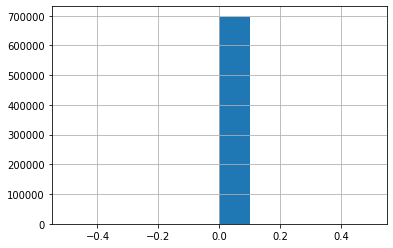

In [47]:
df['revenue_on_event'].hist()

In [48]:
df.columns

Index(['AbGroup', 'user_id', 'time_stamp', 'install_date', 'event_name',
       'platform', 'network_name', 'country_name', 'InGameTime',
       'LastCompletedLevel', 'avg_energy_amount', 'revenue_on_event',
       'revenue_on_other_activities', 'gold_on_event',
       'gold_on_other_activities'],
      dtype='object')

In [49]:
df[['revenue_on_event',
       'revenue_on_other_activities', 'gold_on_event',
       'gold_on_other_activities']].describe()

,revenue_on_event,revenue_on_other_activities,gold_on_event,gold_on_other_activities
count,696840.0,696840.0,45412.000000,168193.000000
mean,0.0,0.0,1992.865322,936.481899
std,0.0,0.0,3895.541280,3522.989145
min,0.0,0.0,500.000000,100.000000
25%,0.0,0.0,500.000000,500.000000
50%,0.0,0.0,1000.000000,600.000000
75%,0.0,0.0,2400.000000,1000.000000
max,0.0,0.0,189600.000000,755950.000000


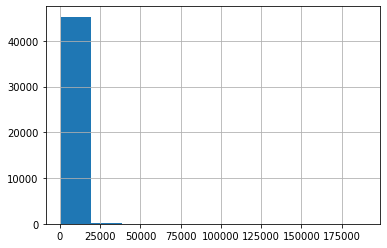

In [50]:
df['gold_on_event'].hist()

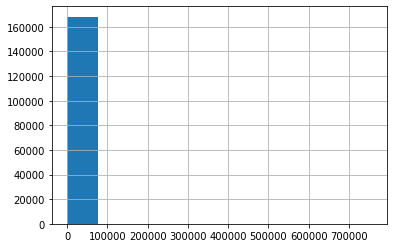

In [51]:
df['gold_on_other_activities'].hist()

In [52]:
df['gold_on_event_flag'] = (df['gold_on_event'] > 0) * 1
df['gold_on_other_activities_flag'] = (df['gold_on_other_activities'] > 0) * 1

In [53]:
(df.groupby(['AbGroup'])
[['gold_on_event_flag','gold_on_event']]
 .agg({'gold_on_event_flag':['count','mean'],
       'gold_on_event':['mean','median']}))

gold_on_event_flag          gold_on_event        
                     count     mean          mean  median
AbGroup                                                  
Control             558070  0.06523   1965.211658  1000.0
Test                138770  0.06492   2104.606505  1500.0

In [54]:
t = df.groupby('user_id')['AbGroup'].nunique().reset_index()

In [55]:
t

,user_id,AbGroup
0,00000d6d79ec151d74c5b0c0705d9d9fe252fe83,1
1,000133682d2dcd90c1a9c8ca5e34a294f31af64f,1
2,0001f13b0535b174bc7e36a1846c31c7a091c4b0,1
3,00021d57aced59fbfaf63ba620afada82fc06ca8,1
4,00027b7d34e10c17bfd4f76aa626403a2c5d1044,1
...,...,...
110955,fffea25b3877c861a4ebaa00e8fb9c5b96672e00,1
110956,fffeb6c54253ef0e7b0c4f38eb81a9dd9aebcb14,1
110957,ffff1964e1cb3bb0fc17c9ed440e3a6b6e6adf99,1
110958,ffff86c1dc72ba25d61ad8c92e9a5b3d6e2f5547,1


In [56]:
t[t['AbGroup'] > 1]

,user_id,AbGroup
202,007a61c7cc84aa559280c6d222aa3e15cb5e0114,2
208,007c891d5eb34c1398966a836d74a123452384de,2
895,02125379d8faf43debf755edfb32758ea5d789d8,2
1097,028e3fc09324ac6df71fccf432dabe44e476956c,2
1107,02977b73d35305fc135ea01bfcc9e1aa334d480a,2
...,...,...
110097,fe08c305b0317eecc6b5cf3cc5362fc912afdc0b,2
110362,fea60891a7ef95c7b95a0b1e58cb9d755684b3de,2
110480,fef449646b98d04def88b9ddb45e7c43bd9a278a,2
110515,ff079e7288b379b4e47650da302a5cc23e8c7ad3,2


In [57]:
t = (df.groupby(['user_id','AbGroup'])[['gold_on_event_flag','gold_on_event']]
 .agg({'gold_on_event_flag':['count','mean'],
       'gold_on_event':['mean','median']})).reset_index()

In [58]:
t

user_id  AbGroup gold_on_event_flag  \
                                                                       count   
0       00000d6d79ec151d74c5b0c0705d9d9fe252fe83  Control                  2   
1       000133682d2dcd90c1a9c8ca5e34a294f31af64f  Control                 19   
2       0001f13b0535b174bc7e36a1846c31c7a091c4b0  Control                 11   
3       00021d57aced59fbfaf63ba620afada82fc06ca8     Test                 13   
4       00027b7d34e10c17bfd4f76aa626403a2c5d1044     Test                  7   
...                                          ...      ...                ...   
111307  fffea25b3877c861a4ebaa00e8fb9c5b96672e00  Control                  1   
111308  fffeb6c54253ef0e7b0c4f38eb81a9dd9aebcb14  Control                  5   
111309  ffff1964e1cb3bb0fc17c9ed440e3a6b6e6adf99  Control                  6   
111310  ffff86c1dc72ba25d61ad8c92e9a5b3d6e2f5547  Control                  5   
111311  ffffb50d0170ef0bc2eda7d20211b2c963c61e2a  Control                 24   

                 gold_on_event          
            mean          mean  median  
0       0.000000           NaN     NaN  
1       0.105263        1250.0  1250.0  
2       0.000000           NaN     NaN  
3       0.000000           NaN     NaN  
4       0.000000           NaN     NaN  
...          ...           ...     ...  
111307  0.000000           NaN     NaN  
111308  0.000000           NaN     NaN  
111309  0.000000           NaN     NaN  
111310  0.000000           NaN     NaN  
111311  0.000000           NaN     NaN  

[111312 rows x 6 columns]

In [59]:
t.columns = ['_'.join(el) for el in t.columns.to_flat_index()]

In [60]:
t

,user_id_,AbGroup_,gold_on_event_flag_count,gold_on_event_flag_mean,gold_on_event_mean,gold_on_event_median
0,00000d6d79ec151d74c5b0c0705d9d9fe252fe83,Control,2,0.000000,NaN,NaN
1,000133682d2dcd90c1a9c8ca5e34a294f31af64f,Control,19,0.105263,1250.0,1250.0
2,0001f13b0535b174bc7e36a1846c31c7a091c4b0,Control,11,0.000000,NaN,NaN
3,00021d57aced59fbfaf63ba620afada82fc06ca8,Test,13,0.000000,NaN,NaN
4,00027b7d34e10c17bfd4f76aa626403a2c5d1044,Test,7,0.000000,NaN,NaN
...,...,...,...,...,...,...
111307,fffea25b3877c861a4ebaa00e8fb9c5b96672e00,Control,1,0.000000,NaN,NaN
111308,fffeb6c54253ef0e7b0c4f38eb81a9dd9aebcb14,Control,5,0.000000,NaN,NaN
111309,ffff1964e1cb3bb0fc17c9ed440e3a6b6e6adf99,Control,6,0.000000,NaN,NaN
111310,ffff86c1dc72ba25d61ad8c92e9a5b3d6e2f5547,Control,5,0.000000,NaN,NaN


In [27]:
t.groupby('AbGroup_').agg(['count','mean'])

gold_on_event_flag_count           gold_on_event_flag_mean            \
                            count      mean                   count      mean   
AbGroup_                                                                        
Control                     89034  6.268055                   89034  0.031600   
Test                        22278  6.229015                   22278  0.030891   

         gold_on_event_mean              gold_on_event_median               
                      count         mean                count         mean  
AbGroup_                                                                    
Control               10685  2119.778819                10685  2002.976135  
Test                   2603  2417.938571                 2603  2296.811371

In [28]:
group_size = df['AbGroup'].value_counts().values

In [29]:
df.head()

,AbGroup,user_id,time_stamp,install_date,event_name,platform,network_name,country_name,InGameTime,LastCompletedLevel,avg_energy_amount,revenue_on_event,revenue_on_other_activities,gold_on_event,gold_on_other_activities,gold_on_event_flag,gold_on_other_activities_flag
0,Control,d60ebcaecff2dc1d360a8a41271e6fd8a902c107,2020-02-10,2019-11-10,ResourceSpend,itunes,Organic,United Kingdom of Great Britain and Northern I...,276180,345,54.0,0.0,0.0,NaN,NaN,0,0
1,Test,f6e385b0ab43d5aea9cfcc408aa84029a4ea5fdb,2020-03-04,2019-11-05,ResourceSpend,itunes,Paid,United States of America,166095,199,50.0,0.0,0.0,NaN,NaN,0,0
2,Control,a4c80c8524e2c11cc238553d7b02da01ce2aad66,2020-02-26,2020-01-02,ResourceSpend,itunes,Paid,Canada,240986,84,39.0,0.0,0.0,NaN,NaN,0,0
3,Control,7ea2e4599ae33760c307e254839317bd5b17a63c,2020-02-21,2020-01-13,ResourceSpend,itunes,Organic,France,989822,1176,21.0,0.0,0.0,NaN,NaN,0,0
4,Control,6495168982929360dc6d84bf0766d8963a7ddc41,2020-02-18,2020-02-05,ResourceSpend,itunes,Paid,Spain,52106,66,43.0,0.0,0.0,500.0,NaN,1,0


In [30]:
(df.groupby(['AbGroup'])
[['gold_on_event_flag','gold_on_event']]
 .agg({'gold_on_event_flag':['count','mean'],
       'gold_on_event':['mean','median']}))

gold_on_event_flag          gold_on_event        
                     count     mean          mean  median
AbGroup                                                  
Control             558070  0.06523   1965.211658  1000.0
Test                138770  0.06492   2104.606505  1500.0

In [31]:
group_size

array([558070, 138770])

In [32]:
from tqdm.notebook import tqdm

In [33]:
n = 1000
result = []
base_diff = 500

for _ in tqdm(range(n)):
  a = df.sample(group_size[0],replace=True)['gold_on_event'].median()
  b = df.sample(group_size[1],replace=True)['gold_on_event'].median()
  result.append(np.abs(a-b) >= base_diff)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [34]:
np.mean(result)

0.119

In [61]:
(df.groupby(['AbGroup'])
[['gold_on_event_flag','gold_on_event']]
 .agg({'gold_on_event_flag':['count','mean'],
       'gold_on_event':['mean','median']}))

gold_on_event_flag          gold_on_event        
                     count     mean          mean  median
AbGroup                                                  
Control             558070  0.06523   1965.211658  1000.0
Test                138770  0.06492   2104.606505  1500.0

In [64]:
(558070 + 138770) / 2

348420.0

In [ ]:
# In this case we count mean instead of median metrics

In [63]:
n = 1000
result = []
base_diff = 139.39484700000025

for _ in tqdm(range(n)):
  a = df.sample(group_size[0],replace=True)['gold_on_event'].mean()
  b = df.sample(group_size[1],replace=True)['gold_on_event'].mean()
  result.append(np.abs(a-b) >= base_diff)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [73]:
import numpy as np
from scipy.stats import ttest_ind

a = df.sample(group_size[0],replace=True)['gold_on_event'].mean()
b = df.sample(group_size[1],replace=True)['gold_on_event'].mean()

res = ttest_ind(a, b)

print(res)

Ttest_indResult(statistic=nan, pvalue=nan)


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3724: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Used T-criterion in order to find p-value

In [74]:
from scipy.stats import t
from numpy import sqrt

mean_a, mean_b = df['gold_on_event'].mean(), df['gold_on_event'].mean()
sd_a, sd_b = df['gold_on_event'].std(), df['gold_on_event'].std()
N = 348420.0

se = sqrt((sd_a ** 2)/N + (sd_b ** 2)/N)
t_value = (mean_a - mean_b)/se

p = t.sf(t_value, N-2)
print(f'p-value={p}')
if p >= 0.05:
    print('Мы НЕ можем отклонить нулевую гипотезу')
else:
    print('Мы можем отклонить нулевую гипотезу')

p-value=0.5
Мы НЕ можем отклонить нулевую гипотезу


In [75]:
df['gold_on_event_nona'] = df['gold_on_event'].fillna(0)

In [76]:
(df.groupby(['AbGroup'])
[['gold_on_event_flag','gold_on_event']]
 .agg({'gold_on_event_flag':['count','mean'],
       'gold_on_event':['mean','median']}))

gold_on_event_flag          gold_on_event        
                     count     mean          mean  median
AbGroup                                                  
Control             558070  0.06523   1965.211658  1000.0
Test                138770  0.06492   2104.606505  1500.0

In [77]:
(df.groupby(['AbGroup'])
[['gold_on_event_nona']]
 .agg(['mean','median']))

gold_on_event_nona       
                      mean median
AbGroup                          
Control         128.191087    0.0
Test            136.631837    0.0

In [78]:
n = 1000
result = []
base_diff = 136.631837 - 128.191087

for _ in tqdm(range(n)):
  a = df.sample(group_size[0],replace=True)['gold_on_event_nona'].mean()
  b = df.sample(group_size[1],replace=True)['gold_on_event_nona'].mean()
  result.append(np.abs(a-b) >= base_diff)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [82]:
print(f'p-value: {np.mean(result)}')

p-value: 0.009


Итог:
можно раскатывать обнову, которая была протестирована на группе Test, так как был проведен A/B тест с бутстрапом, в ходе которого получили p-value=0.009 < 0.05 -> Отклоняем нулевую гипотезу о том, что данные двух групп статистически почти не отличаются